In [1]:
# импортируем библиотеки numpy и pandas
import pandas as pd
import numpy as np

# импортируем библиотеку datetime для работы с датами
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 90)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

# задаем стартовое значение для генератора случайных чисел
seedval = 111111

<Axes: >

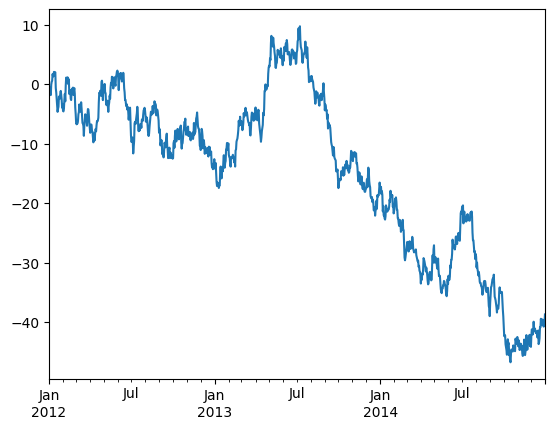

In [2]:
# генерируем временной ряд на основе случайного блуждания
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01', '2014-12-31'))
walk_ts = s.cumsum()

# эта строка визуализирует случайное блуждание
walk_ts.plot()

<Axes: >

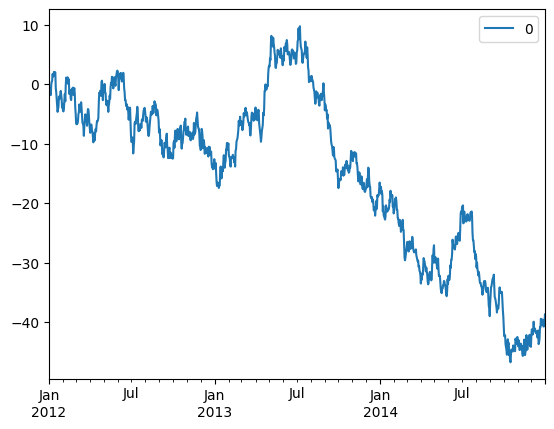

In [3]:
# Визуализация объекта DataFrame с одним столбцом даст аналогичный результат,
# что и визуализация объекта Series, только теперь будет еще добавлена легенда
walk_df = pd.DataFrame(walk_ts)
walk_df.plot()

In [4]:
# сгенерируем два случайных блуждания, которые станут двумя столбцами объекта DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

<Axes: >

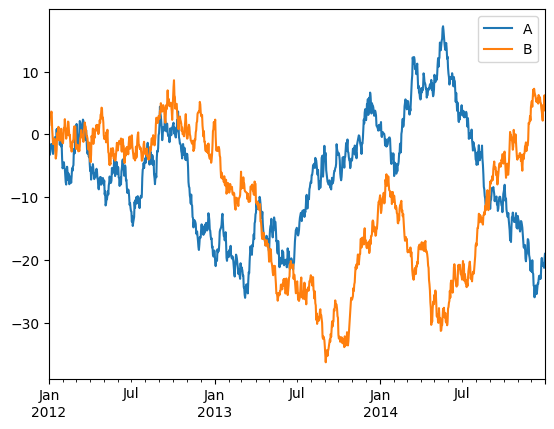

In [5]:
# визуализируем данные датафрейма, на графике каждый
# столбец будет представлен линией, а также будет добавлена легенда
walk_df.plot()

<Axes: xlabel='C'>

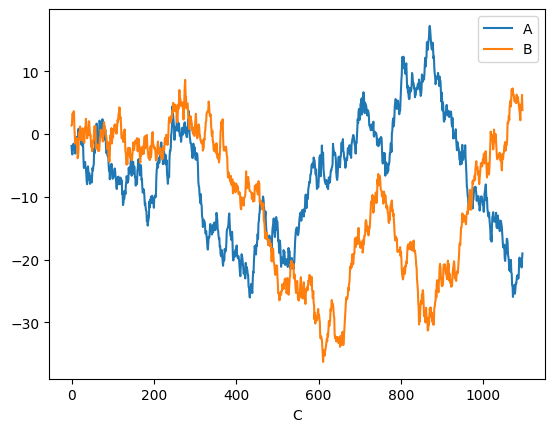

In [6]:
# создаем копию случайного блуждания
df2 = walk_df.copy()

# добавляем столбец C, который принимает значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)

# в качестве меток оси X вместо дат используем значения столбца 'C', получаем метки оси x
# в диапазоне от 0 до 1000
df2.plot(x='C', y=['A', 'B'])

### Настройка внешнего вида графика временного ряда

#### Добавление заголовка и изменение подписей осей
Заголовок графика можно задать с помощью параметра **title**. Метки осей задают
с помощью функций **plt.ylabel()** и **plt.xlabel()** сразу после вызова метода .plot()

Text(0, 0.5, 'Money')

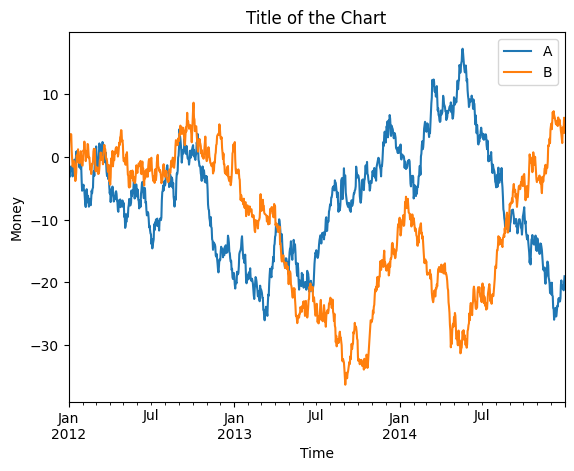

In [7]:
# создаем график временного ряда с заголовком и заданными подписями осей x и y
# заголовок задаем с помощью параметра title метода .plot()
walk_df.plot(title='Title of the Chart')
# после вызова метода .plot() явно задаем подписи осей x и y
plt.xlabel('Time')
plt.ylabel('Money')

#### Настройка содержимого легенды и ее расположения
Чтобы изменить текст, использующийся в легенде для идентификации каждой серии
данных (по умолчанию это имя столбца датафрейма), запишите объект **ax**, который
будет возвращен методом .plot(), и затем воспользуйтесь методом **.legend()** этого
объекта.

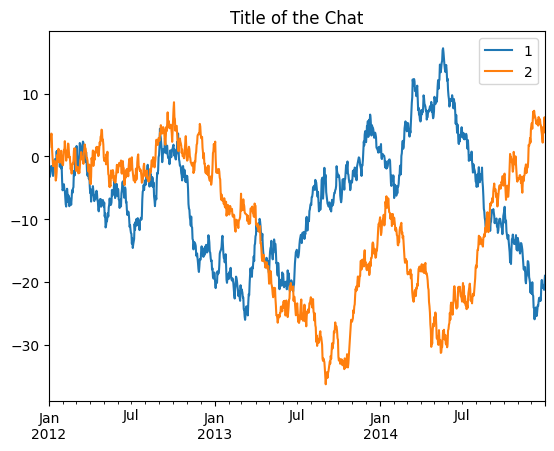

In [8]:
# изменяем элементы легенды, соответствующие именам столбцов датафрейма
ax = walk_df.plot(title='Title of the Chat')
# эта строка задает метки легенды
ax.legend(['1', '2'])

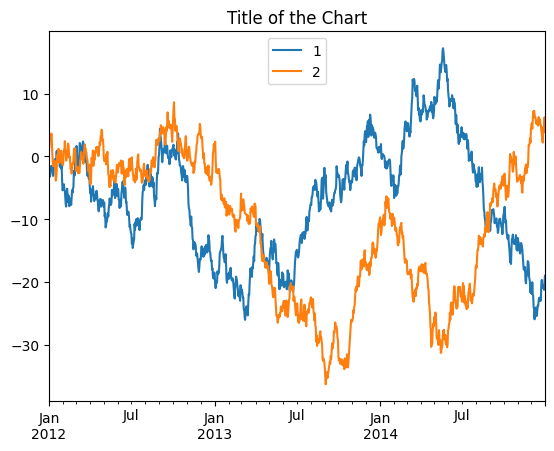

In [9]:
# изменяем расположение легенды
ax = walk_df.plot(title='Title of the Chart')

# применяем к легенде вертикальное выравнивание сверху
# с горизонтальным выравниванием по центру
ax.legend(['1', '2'], loc='upper center')

<Axes: title={'center': 'Title of the Chart'}>

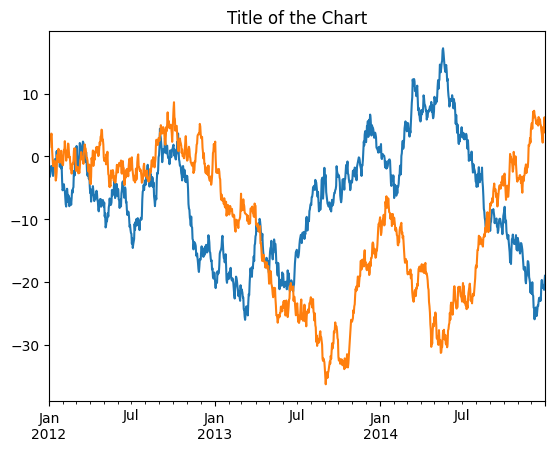

In [10]:
# отключаем легенду с помощью legend=False
walk_df.plot(title='Title of the Chart', legend=False)

<Axes: >

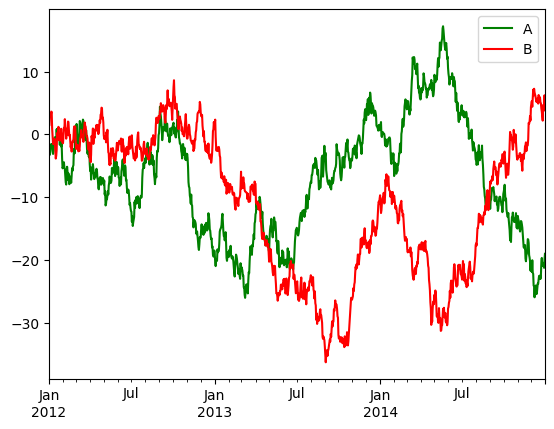

In [11]:
# меняем цвета линий графика, используя символьный
# код для первой линии и шестнадцатеричный RGB-код для второй
walk_df.plot(style=['g', '#FF0000'])

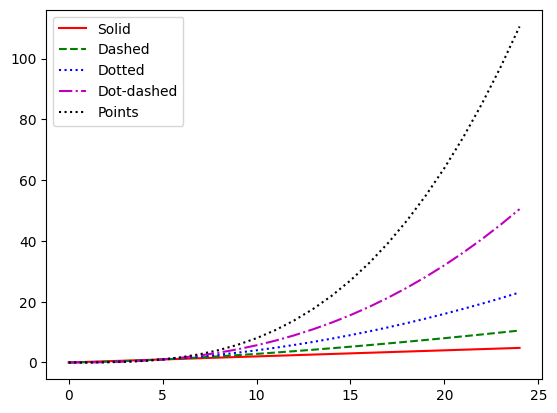

In [12]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0: t,
                          1: t**1.5,
                          2: t**2,
                          3: t**2.5,
                          4: t**3})

# создаем график, задав цвет и стиль каждой линии
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])

# задаем легенду
ax.legend(legend_labels, loc='upper left')

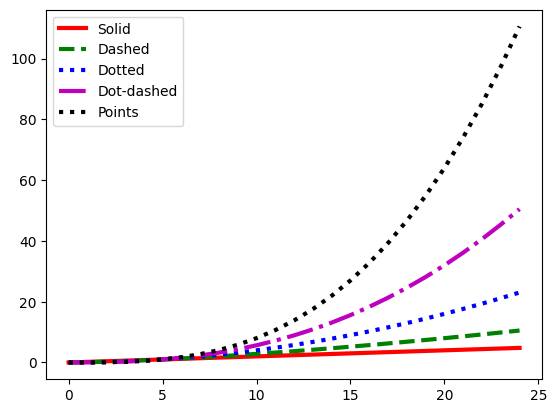

In [13]:
# заново строим график, задав стиль и цвет каждой линии и толщину 3 для всех линий
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left')

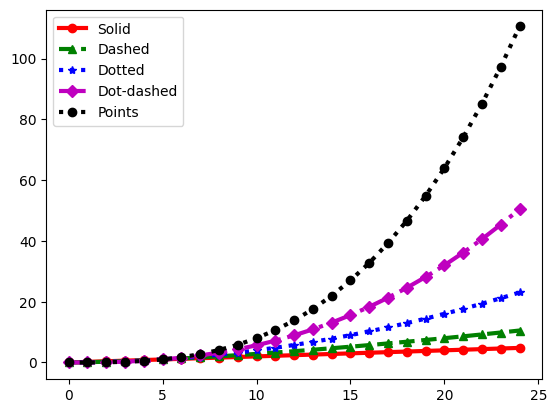

In [14]:
# рисуем заново, добавив маркеры линий
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left')

#### Настройка диапазона делений и меток делений шкалы
Значения, которые библиотека pandas будет использовать в качестве меток де-
лений, можно найти с помощью функции **plt.xticks()**.

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

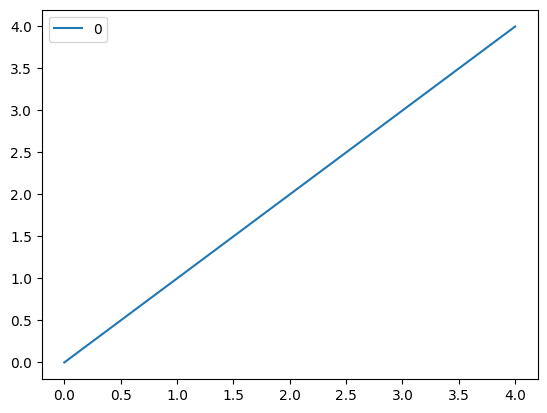

In [15]:
# строим простой график, чтобы продемонстрировать, как извлечь информацию о делениях шкалы
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

([<matplotlib.axis.XTick at 0x7f86867345e0>,
 [Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

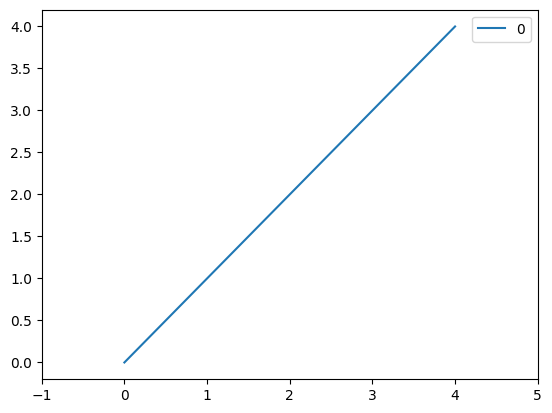

In [16]:
# заново задаем диапазон оси x от –1 от 5 и выводим деления только для целочисленных значений
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6))

([<matplotlib.axis.YTick at 0x7f86867bd840>,
 [Text(0, 0, 'A'),
  Text(0, 1, 'B'),
  Text(0, 2, 'C'),
  Text(0, 3, 'D'),
  Text(0, 4, 'E')])

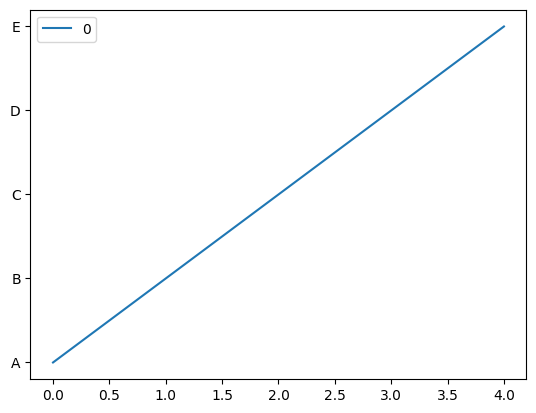

In [17]:
# переименовываем метки делений оси y в метки A, B, C, D и E
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list('ABCDE'))

#### Форматирование меток делений, содержащих даты, с помощью форматтеров и локаторов
Форматирование меток осей, содержащих даты и время, выполняется с помощью
локаторов (locators) и форматтеров (formatters). Локаторы задают
расположение делений, а форматтеры задают формат меток, выводимых под
делениями.

Библиотека matplotlib в рамках модуля matplotlib.dates предлагает несколько
классов для упрощения работы с такими осями. Специальные локаторы **MinuteLocator,
HourLocator, DayLocator, WeekdayLocator, MonthLocator и YearLocator** задают
расположение делений для каждого типа даты. Класс DateFormatter можно использовать
для преобразования объектов, содержащих даты, в метки соответствующей оси.
По умолчанию используется локатор AutoDateLocator и форматтер AutoDateFormatter.

Их можно легко изменить, выбрав другой локатор или форматтер.

<Axes: >

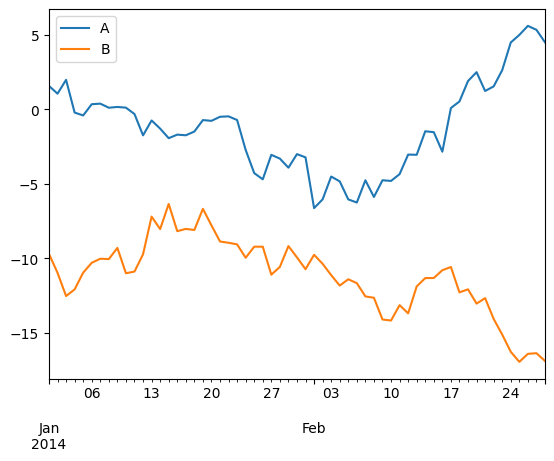

In [18]:
# визуализируем данные за январь-февраль 2014 на основе случайного блуждания
walk_df.loc['2014-01': '2014-02'].plot()

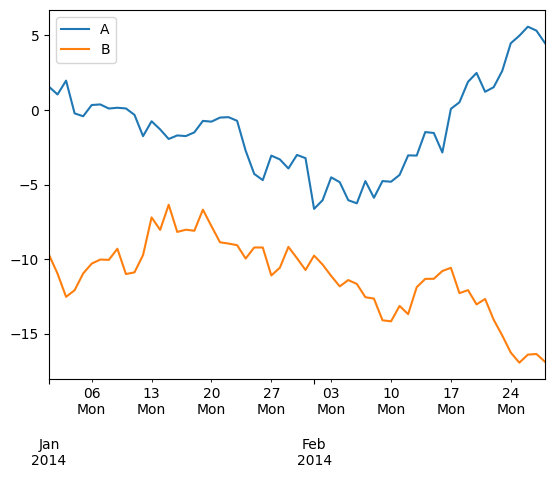

In [19]:
# импортируем необходимые локаторы и форматтеры
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# визуализируем данные за январь-февраль 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

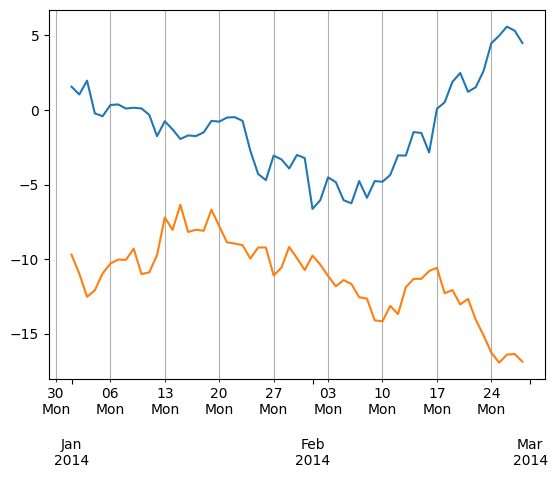

In [20]:
# создаем копию данных за январь-февраль 2014
walk_subset = walk_df['2014-01':'2014-02']

# строим график
flp, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot(walk_subset.index.to_pydatetime(), walk_subset, '-')

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# включаем линии сетки для промежуточных делений
ax.xaxis.grid(True, 'minor')

# отключаем линии сетки для основных делений
ax.xaxis.grid(False, 'major')

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

И в заключение мы выведем метки и линии сетки только для основных делений
на еженедельной основе и с использованием формата YYYY-MM-DD. Однако,
поскольку они будут перекрываться, мы повернем их для предотвращения перекрытия.
Это вращение можно задать с помощью функции **fig.autofmt_xdate()**

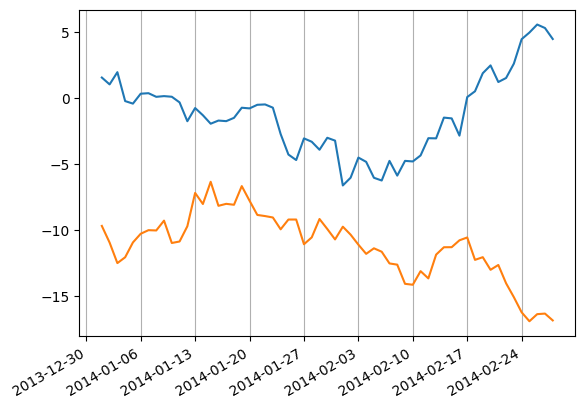

In [21]:
# строим график
flg, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot(walk_subset.index.to_pydatetime(), walk_subset, '-')

# выводим линии сетки для основных делений
ax.xaxis.grid(True, 'major')

# настраиваем метки основных делений
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# выполняем поворот меток с датами
flg.autofmt_xdate()

#### Виды графиков, часто использующиеся в статистическом анализе данных

<Axes: >

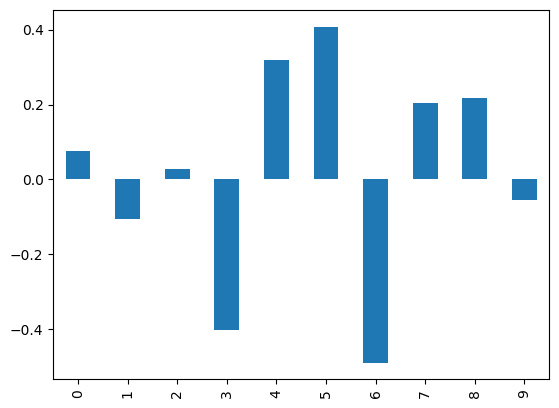

In [22]:
# сгенерируем данные для столбиковой диаграммы
# сгенерируем небольшую серию, состоящую из 10 случайных значений
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)

# строим столбиковую диаграмму
s.plot(kind='bar')

<Axes: >

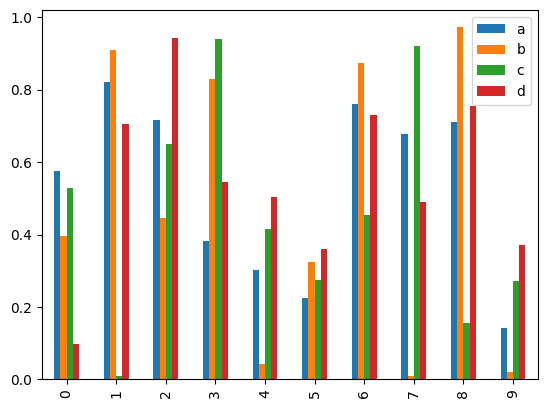

In [23]:
# сгенерируем данные для столбиковой диаграммы на основе нескольких серий
# сгенерируем 4 столбца, состоящих из 10 случайных значений
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# строим столбиковую диаграмму на основе нескольких серий
df2.plot(kind='bar')

<Axes: >

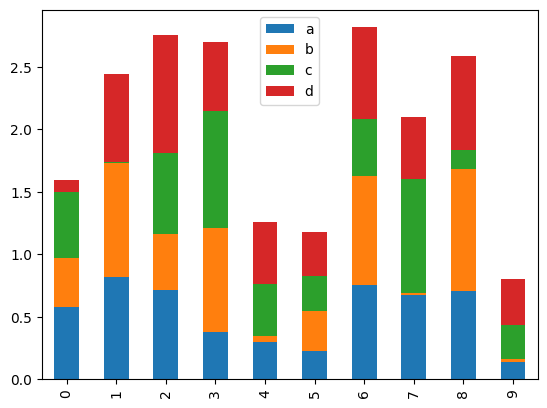

In [24]:
# вертикальная состыкованная столбиковая диаграмма
df2.plot(kind='bar', stacked=True)

<Axes: >

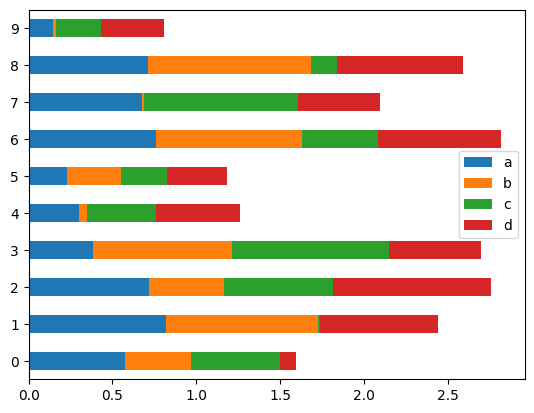

In [25]:
# горизонтальная состыкованная столбиковая диаграмма
df2.plot(kind='barh', stacked=True)

#### Визуализация распределений данных с помощью гистограмм
Следующий программый код строит гистограмму на основе 1000 случайных
чисел, подчиняющихся нормальному распределению

array([[<Axes: title={'center': '0'}>]], dtype=object)

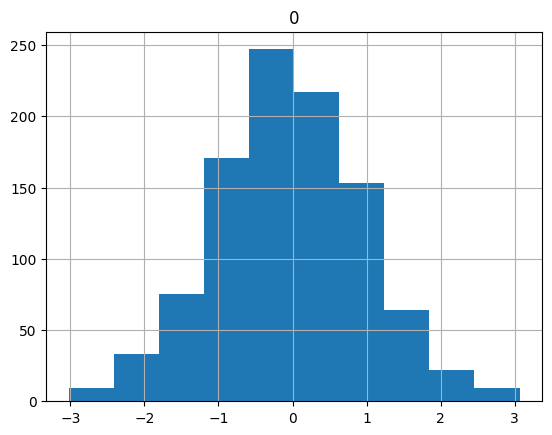

In [26]:
# сгенерируем данные для гистограммы
np.random.seed(seedval)

# генерируем 1000 случайных чисел
dfh = pd.DataFrame(np.random.randn(1000))

# строим гистограмму
dfh.hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

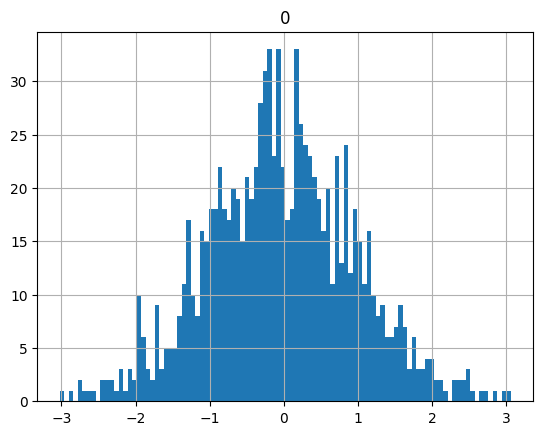

In [27]:
# снова строим гистограмму, но теперь с
# большим количеством интервалов (бинов)
dfh.hist(bins=100)

Если данные состоят из нескольких серий, функция построения гистограммы
автоматически сгенерирует несколько гистограмм, по одной для каждой серии

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'c'}>, <Axes: title={'center': 'd'}>]],
      dtype=object)

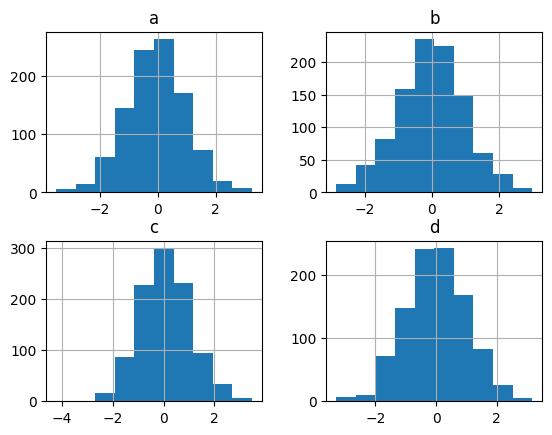

In [28]:
# сгенерируем данные для графика с несколькими гистограммами
# создаем датафрейм с 4 столбцами, каждый состоит из 1000 случайных чисел
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

# строим график. Поскольку у нас 4 столбца, pandas строит четыре гистограммы
dfh.hist()

Чтобы наложить несколько гистограмм друг на друга в рамках одного и того же
рисунка (и тем самым визуализировать разницу распределений), несколько раз
вызовите функцию pyplot.hist() перед вызовом метода .show()

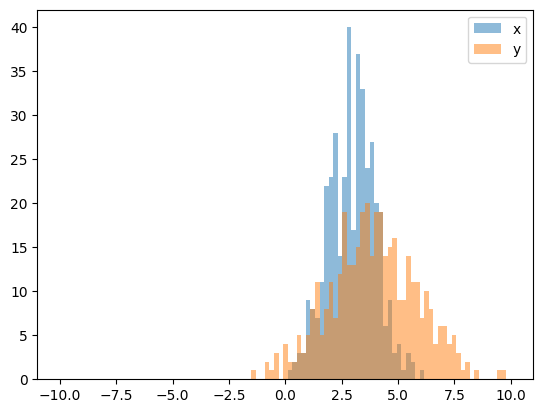

In [29]:
# напрямую воспользуемся модулем pyplot для наложения нескольких гистограмм
# сгенерируем два распределения, каждое со своим средним значением и стандартным отклонением
np.random.seed(seedval)
x = [np.random.normal(3, 1) for _ in range(400)]
y = [np.random.normal(4, 2) for _ in range(400)]

# задаем интервалы (диапазон от –10 до 10 и 100 интервалов)
bins = np.linspace(-10, 10, 100)

# строим график x с помощью plt.hist, 50 % прозрачности
plt.hist(x, bins, alpha=0.5, label='x')

# строим график y с помощью plt.hist, 50 % прозрачности
plt.hist(y, bins, alpha=0.5, label='y')

# размещаем легенду в верхнем правом углу
plt.legend(loc='upper right')

#### Визуализация распределений категориальных данных с помощью ящичных диаграмм с усами
Ящичные диаграммы основаны на описательных статистиках и являются полезным
инструментом, позволяющим визуализировать распределения категориальных
данных с помощью квартилей. Каждый ящик представляет значения, располагающиеся
между первым и третьим квартилями, усы охватывают значения в пределах 1,5
межквартильного размаха от границ ящика

<Axes: >

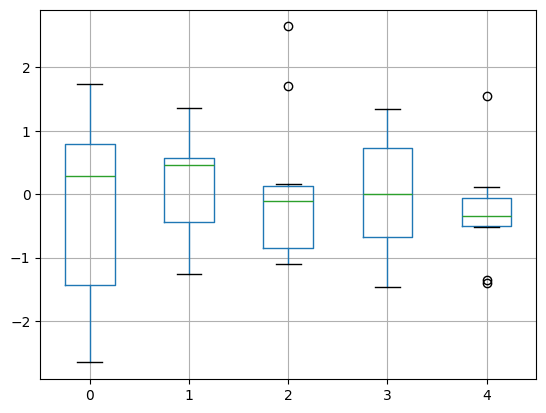

In [30]:
# сгенерируем данные для ящичной диаграммы
# сгенерируем серию
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10, 5))

# строим график
dfb.boxplot(return_type='axes')

#### Отображение накопленных итогов с помощью площадных диаграмм
Площадные диаграммы используются для визуализации итогов, накопленных по
прошествии определенного времени, и для демонстрации изменений трендов,
происходящих с течением времени, по взаимосвязанным признакам. Кроме того,
такие графики можно «сложить» для иллюстрации итоговых значений по всем
переменным.

<Axes: >

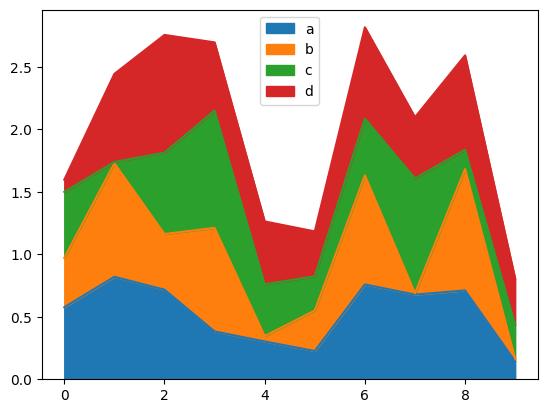

In [31]:
# сгенерируем данные для состыкованной площадной диаграммы
# создадим датафрейм из 4 столбцов, используя случайные числа
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# создаем площадную диаграмму
dfa.plot(kind='area')

<Axes: >

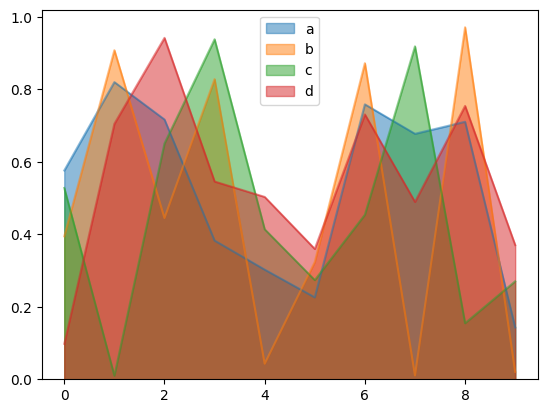

In [32]:
# строим несостыкованную площадную диаграмму
dfa.plot(kind='area', stacked=False)

#### Визуализация взаимосвязи между двумя переменными с помощью диаграммы рассеяния

<Axes: xlabel='a', ylabel='b'>

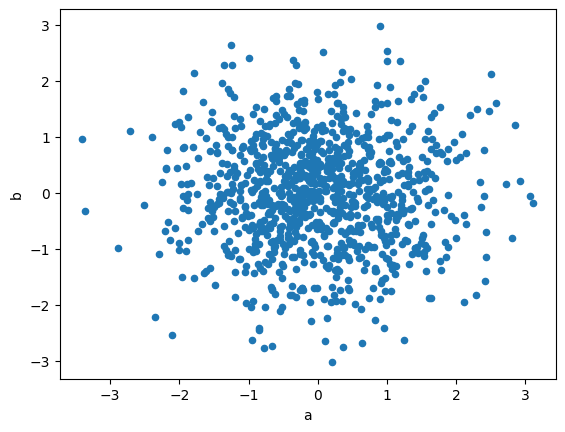

In [33]:
# создаем диаграмму рассеяния, состоящую из двух серий
# нормально распределенных случайных чисел
# мы ожидаем получить кластер с координатами центра 0,0
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b')

#### Визуализация оценок распределения с помощью графика ядерной оценки плотности

С гистограммой тесно связан график плотности, который строится на основе
оценки непрерывного распределения вероятности по результатам измерений.
Обычно стремятся аппроксимировать это распределение комбинацией ядер, т. е.
комбинацией более простых распределений, например нормального (гауссова).
Поэтому графики плотности еще называют графиками ядерной оценки плотно-
сти (**KDE – kernel density estimate**).

<Axes: ylabel='Density'>

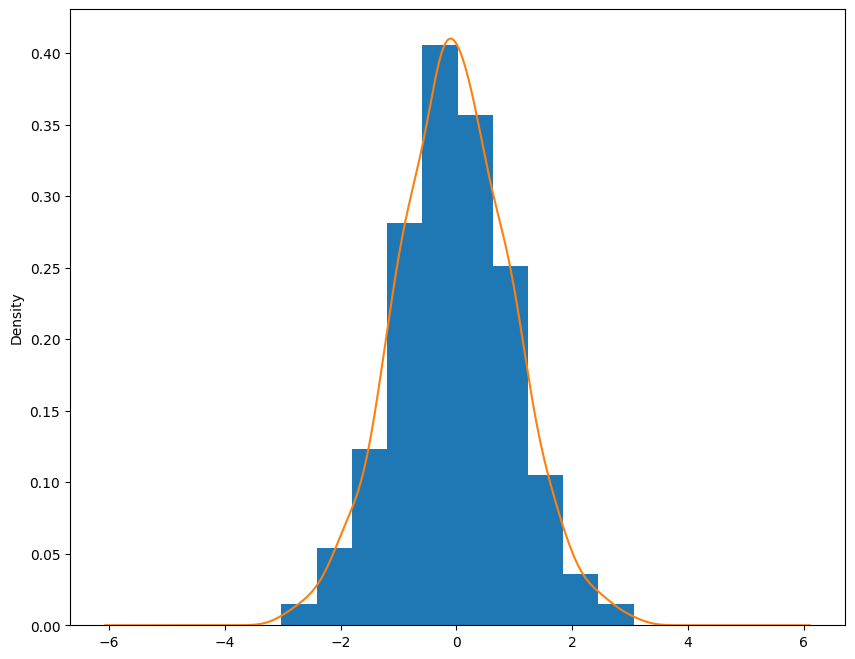

In [34]:
# создаем данные для графика ядерной оценки плотности
# сгенерируем серию из 1000 случайных чисел
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))

# строим график
s.hist(density=True)  # выводим столбики
s.plot(kind='kde', figsize=(10, 8))

#### Визуализация корреляций между несколькими переменными с помощью матрицы диаграмм рассеяния
Матрица диаграмм рассеяния – популярный способ визуализации линейной корреляции
между несколькими переменными. Программный код, приведенный ниже, создает 
матрицу диаграмм рассеяния на основе случайных чисел и строит диаграмму рассеяния
для каждой комбинации переменных, а также график ядерной оценки плотности
для каждой переменной по диагонали

array([[<Axes: xlabel='a', ylabel='a'>, <Axes: xlabel='b', ylabel='a'>,
        <Axes: xlabel='c', ylabel='a'>, <Axes: xlabel='d', ylabel='a'>],
       [<Axes: xlabel='a', ylabel='b'>, <Axes: xlabel='b', ylabel='b'>,
        <Axes: xlabel='c', ylabel='b'>, <Axes: xlabel='d', ylabel='b'>],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b', ylabel='c'>,
        <Axes: xlabel='c', ylabel='c'>, <Axes: xlabel='d', ylabel='c'>],
       [<Axes: xlabel='a', ylabel='d'>, <Axes: xlabel='b', ylabel='d'>,
        <Axes: xlabel='c', ylabel='d'>, <Axes: xlabel='d', ylabel='d'>]],
      dtype=object)

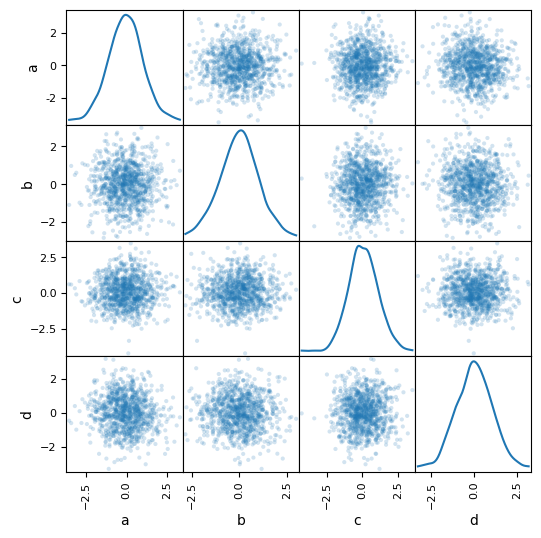

In [35]:
# создаем данные для матрицы диаграмм рассеяния
# импортируем класс scatter_matrix
from pandas.plotting import scatter_matrix

# создаем датафрейм с 4 столбцами, каждый состоит из 1000 случайных чисел
np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

# строим матрицу диаграмм рассеяния
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde')

#### Отображение взаимосвязей между несколькими переменными с помощью тепловых карт
Тепловая карта – это графическое представление данных, при котором значения
внутри матрицы представлены цветами. Это эффективный инструмент, который позволяет визуализировать значения, получаемые на пересечении двух переменных.

Наиболее распространенный сценарий состоит в том, чтобы вычислить значения
матрицы, нормированные в диапазоне от 0,0 по 1,0, и получить таблицу,
которая образована пересечениями строк – корреляциями между двумя перемен-
ными. Значения с наименьшей корреляцией (0.0) будут отображаться в виде более
темных тонов, а значения с наибольшей корреляцией (1.0) будут отображаться
в виде более светлых тонов.

In [36]:
# создаем данные для теплокарты
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4], ['V', 'W', 'X', 'Y', 'Z'])
heatmap_date = pd.DataFrame({'A' : s + 0.0,
                            'B' : s + 0.1,
                            'C' : s + 0.2,
                            'D' : s + 0.3,
                            'E' : s + 0.4,
                            'F' : s + 0.5,
                            'G' : s + 0.6
                            })
heatmap_date

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

([<matplotlib.axis.YTick at 0x7f866588b790>,
 [Text(0, 0, 'V'),
  Text(0, 1, 'W'),
  Text(0, 2, 'X'),
  Text(0, 3, 'Y'),
  Text(0, 4, 'Z')])

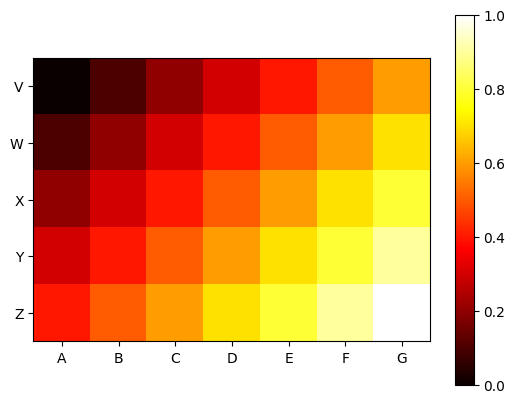

In [37]:
# строим теплокарту
plt.imshow(heatmap_date, cmap='hot', interpolation='none')
plt.colorbar()  # добавим шкалу интенсивности цвета

# задаем метки
plt.xticks(range(len(heatmap_date.columns)), heatmap_date.columns)
plt.yticks(range(len(heatmap_date)), heatmap_date.index)

#### Размещение нескольких графиков на одном рисунке вручную

Чтобы разместить несколько подграфиков на одном и том же рисунке с помощью
matplotlib, вызовите несколько раз функцию plt.subplot2grid(). На каждом проходе
учитываются размер подграфика (shape=(height, width)) и его расположение
(loc=(row, column)). 

Размер – это общее количество столбцов, а не пикселей.

Значение, возвращаемое каждым вызовом функции plt.subplot2grid(), – это
уникальный объект AxesSubplot, который можно использовать для отрисовки подграфика.

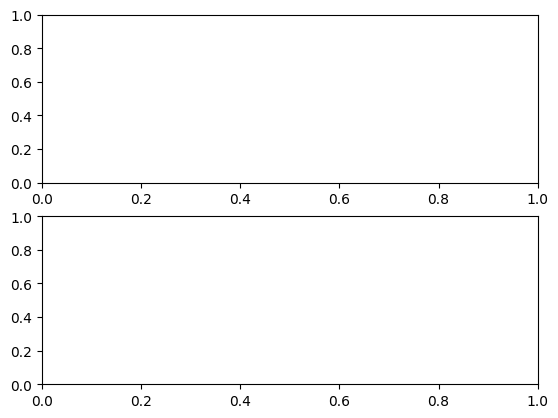

In [38]:
# создаем два подграфика на одном рисунке, используя сетку 2×1 (2 строки и 1 столбец)
# ax1 – верхняя строка
ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))

# и ax2 – нижняя строка
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))